<a href="https://colab.research.google.com/github/Anu-jo/week3/blob/main/data_under_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


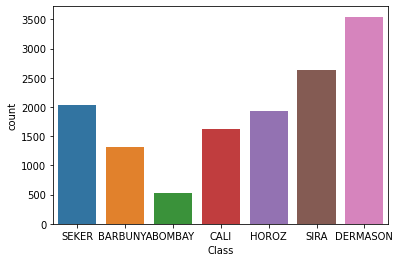

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
import sklearn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
df=pd.read_csv('Dry_Bean_Dataset.csv')
print(df.head())
#data encoding
from sklearn.preprocessing import OneHotEncoder
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(df[["Class"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()
df = df.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))
y = df['Class']#dependent variable
X = df.drop(['Class'], axis = 1)#independent variable
#checking whether data is balanced or not
print("\n\n",df['Class'].value_counts())
g = sns.countplot(df['Class'])
g.set_xticklabels(['SEKER','BARBUNYA','BOMBAY','CALI','HOROZ','SIRA','DERMASON'])
plt.show()


In [ ]:
#Under sampling
rus = RandomUnderSampler(random_state=42, replacement=True)
# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)
print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))
#data standardization
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
 # standardization
X_std = object.fit_transform(x_rus)
print(X_std)
# check missing values
print(df.isnull().any().any())
#remove features with low variance
from sklearn import feature_selection
sel = feature_selection.VarianceThreshold()
train_variance = sel.fit_transform(X_std)
print(train_variance.shape)

original dataset shape: Counter({'DERMASON': 3546, 'SIRA': 2636, 'SEKER': 2027, 'HOROZ': 1928, 'CALI': 1630, 'BARBUNYA': 1322, 'BOMBAY': 522})
Resample dataset shape Counter({'BARBUNYA': 522, 'BOMBAY': 522, 'CALI': 522, 'DERMASON': 522, 'HOROZ': 522, 'SEKER': 522, 'SIRA': 522})
[[ 0.21920582  0.35889428  0.05356832 ... -0.40824829 -0.40824829
  -0.40824829]
 [ 0.06642863  0.21892553 -0.05730606 ... -0.40824829 -0.40824829
  -0.40824829]
 [ 0.46896576  0.93975633  0.72300027 ... -0.40824829 -0.40824829
  -0.40824829]
 ...
 [-0.53402983 -0.5877632  -0.53469042 ... -0.40824829 -0.40824829
   2.44948974]
 [-0.63935893 -0.64711403 -0.64656132 ... -0.40824829 -0.40824829
   2.44948974]
 [-0.52744405 -0.60705981 -0.61343511 ... -0.40824829 -0.40824829
   2.44948974]]
False
(3654, 23)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


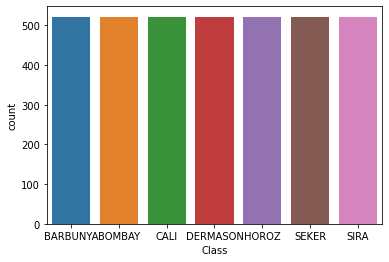

In [ ]:
g_us = sns.countplot(y_rus)
g.set_xticklabels(['SEKER','BARBUNYA','BOMBAY','CALI','HOROZ','SIRA','DERMASON'])
plt.show()

In [ ]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)
X_lda

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


array([[ 2.64931865, -2.28669012,  2.17033366, -2.72244854, -1.03923035,
        -2.3974093 ],
       [ 1.33428765, -1.05963799,  3.68575463, -1.69811644, -1.75172933,
        -1.056052  ],
       [ 2.66334205, -2.21976529,  2.36580382, -2.5404499 , -0.76526182,
        -2.02995891],
       ...,
       [ 2.09475456, -1.2618103 , -0.5082351 ,  0.61563482, -0.28994781,
         1.30430414],
       [ 1.99774574, -1.03158541, -0.79092497,  0.72565945, -0.26821312,
         1.4137352 ],
       [ 1.76692639, -0.15962229, -1.20314046,  0.74654948, -0.15932636,
         1.22705777]])

[ 41.56175922  65.8849523   73.23146435  78.94272949  84.39511625
  89.75152785  94.12217742  97.18504175  98.23389936  99.07111603
  99.43900482  99.68774546  99.86905358  99.96333887  99.99179932
  99.99600254  99.99849514  99.99937514  99.99993731  99.99998617
  99.99999374 100.         100.        ]


Text(0, 0.5, 'Cumulative Explained variance(%)')

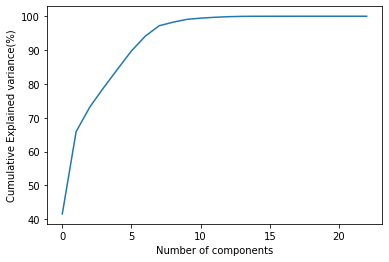

In [ ]:
#dimensionality reduction using PCA
from sklearn.model_selection import train_test_split# model for splitting the data
# we split 80% of the data for model training and 20% accuracy model testing
XTrain, XTest, YTrain, YTest = train_test_split(X_std, y_rus, test_size = 0.2, random_state = 100)
#PCA calculation
pca=PCA()
XTrain_pca=pca.fit_transform(XTrain)
XTest_pca=pca.transform(XTest)
#print(pca.explained_variance_ratio_*100)
cum_sum_pca=np.cumsum(pca.explained_variance_ratio_*100)
print(cum_sum_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained variance(%)')


[ 41.56175922  65.8849523   73.23146435  78.94272949  84.39511625
  89.75152785  94.12217742  97.18504175  98.23389936  99.07111603
  99.43900482  99.68774546  99.86905358  99.96333887  99.99179932
  99.99600254  99.99849514  99.99937514  99.99993731  99.99998617
  99.99999374 100.        ]


Text(0, 0.5, 'Cumulative Kernel pca Explained variance(%)')

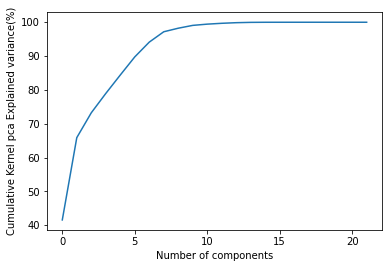

In [ ]:
# Import the Kernel PCA class
from sklearn.decomposition import KernelPCA
# initialize the Kernel PCA object
Kernel_pca = KernelPCA()# finding the kernel pca value
# transform and fit the feature of the training set
XTrain_kernel = Kernel_pca.fit_transform(XTrain)
# transform features of the test set
XTest_kernel = Kernel_pca.transform(XTest)
ex_var=np.var(XTrain_kernel,axis=0)
explained_variance=ex_var/np.sum(ex_var)
print(np.cumsum(explained_variance*100))
plt.plot(np.cumsum(explained_variance*100))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Kernel pca Explained variance(%)')

In [ ]:
#taking 95% of varaiance contributed components
pca_95=PCA(n_components=0.95)
X_pca_95=pca_95.fit_transform(X_std)
print(X_pca_95.shape)
#creating new dataset that is dimensionally reduced
df_new=pd.DataFrame(X_pca_95,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
df_new['Class']=y_rus
print(df_new.head())
#df_new.to_csv('Drybeans_95.csv',index=False)
y_new = df_new['Class']#dependent variable
X_new = df_new.drop(['Class'], axis = 1)#independent variable


(3654, 8)
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.041487 -2.354025  2.297594 -0.377272 -0.933082 -0.219978 -0.847115   
1 -0.154463 -1.761026  2.526436 -0.355575 -0.900068 -0.146678 -0.622507   
2  2.417881  0.725987  2.633448 -1.462603 -0.892735 -0.227022 -1.023523   
3  0.632139 -1.209825  3.196267 -0.878511 -0.922373 -0.123305 -0.609941   
4  1.446450  0.478727  1.403593 -0.943711 -1.105723 -0.374729 -1.566303   

        PC8     Class  
0  0.898650  BARBUNYA  
1  0.751700  BARBUNYA  
2 -0.962167  BARBUNYA  
3 -0.007692  BARBUNYA  
4  0.264376  BARBUNYA  


In [ ]:
from sklearn.preprocessing import OneHotEncoder
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(df_new[["Class"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()
df_new = df_new.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))

In [ ]:
 # standardization
X_std = object.fit_transform(X_new)
print(X_std)

[[-0.01345332 -0.99115666  1.76370189 ... -0.20057168 -0.84197711
   1.07133454]
 [-0.05008865 -0.74147564  1.93936793 ... -0.13373874 -0.61873093
   0.89614632]
 [ 0.7840617   0.30567527  2.021514   ... -0.20699405 -1.01731435
  -1.14705587]
 ...
 [-0.53574118  0.12162926 -1.01734618 ... -1.87612308  0.31883353
   0.77903672]
 [-0.39959863  0.74138275  0.19385066 ... -1.42029521  2.06029649
  -0.97716413]
 [-0.66189334 -0.10135525 -0.77626608 ... -1.78959143  0.77571856
  -0.22025404]]


In [ ]:
from sklearn.model_selection import train_test_split# model for splitting the data
# we split 80% of the data for model training and 20% accuracy model testing
XTrain, XTest, YTrain, YTest = train_test_split(X_std, y_new, test_size = 0.2, random_state = 100)

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Calling the Class
naive_bayes = GaussianNB()

#Fitting the data to the classifier
naive_bayes.fit(XTrain , YTrain)

#Predict on test data
y_predicted = naive_bayes.predict(XTest)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
print('Accuracy score:')
acc_score=accuracy_score(y_predicted , YTest)
acc_score


Accuracy score:


0.9931600547195623

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


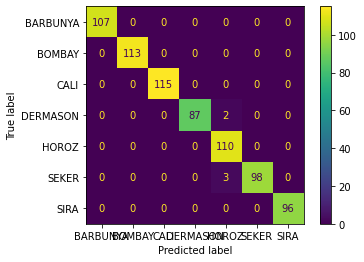

In [ ]:
cm=confusion_matrix(YTest, y_predicted)
cm
plot_confusion_matrix(naive_bayes,XTest,YTest)

In [ ]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="entropy", random_state=100,max_depth=3, min_samples_leaf=7)
clf_model.fit(XTrain,YTrain)
y_predict = clf_model.predict(XTest)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
accuracy_score(YTest,y_predict)

#plot_confusion_matrix(clf_model,YTest,y_predict)

0.9808481532147743

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


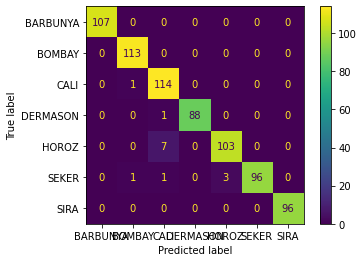

In [ ]:
confusion_matrix(YTest, y_predict)
plot_confusion_matrix(clf_model,XTest,YTest)

In [ ]:
#SVM classifier
from sklearn.svm import SVC
clf = SVC(kernel='rbf', gamma=0.01, C=1000)
clf.fit(XTrain, YTrain)
predictions = clf.predict(XTest)
accuracy_score(YTest, predictions)


1.0

In [ ]:
confusion_matrix(YTest,predictions)

array([[107,   0,   0,   0,   0,   0,   0],
       [  0, 113,   0,   0,   0,   0,   0],
       [  0,   0, 115,   0,   0,   0,   0],
       [  0,   0,   0,  89,   0,   0,   0],
       [  0,   0,   0,   0, 110,   0,   0],
       [  0,   0,   0,   0,   0, 101,   0],
       [  0,   0,   0,   0,   0,   0,  96]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


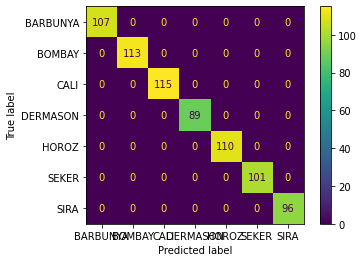

In [ ]:
plot_confusion_matrix(clf,XTest,YTest)